<a href="https://colab.research.google.com/github/MuhammedAshraf2020/CNN_from_scratch/blob/main/Dog_Vs_Cat_using_CNN_from_scratch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import dataset Dog vs** **Cat**


In [115]:
import google.colab as gc
gc.files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohamedashraf2020","key":"1ca9f6971e92e5ca52aa6dbbb48dfec3"}'}

In [116]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.9MB/s]
 97% 529M/543M [00:07<00:00, 137MB/s]
100% 543M/543M [00:07<00:00, 74.6MB/s]
 98% 267M/271M [00:05<00:00, 47.0MB/s]
100% 271M/271M [00:05<00:00, 52.3MB/s]


In [117]:
from zipfile import ZipFile
file_name = "train.zip"

with ZipFile(file_name , "r") as Zip:
  Zip.extractall()
  print("Done")

Done


**prepare trainig data**

In [118]:
import os

In [119]:
photos_names = os.listdir("train")

In [120]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [121]:
X_train = list()
y_train = list()

for photo in photos_names:
  Image = plt.imread("train/"+photo)
  Image = cv2.resize(Image , (150 , 150))
  X_train.append(Image)
  if "cat" in photo:
    y_train.append(0)
  else:
    y_train.append(1)

In [122]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [6]:
X_train.shape

(25000, 150, 150, 3)

**Build Model**

In [133]:
from CNN import Conv2D 
from CNN import MaxPooling2D
from CNN import Dense 
from CNN import Input2D 
from CNN import Model

In [134]:
# Select just 500 from data to reduce time
X = X_train[0:500] / 255
y = y_train[0:500]

In [139]:
Input = Input2D(input_shape = (100 , 150 , 150 , 3))
Conv_layer1 = Conv2D(num_filters=3,
                               kernel_size=3,
                               previous_layer=Input,
                               activation_function = "relu")
Max_poolig_layer = MaxPooling2D(pool_size=2, 
                                           previous_layer=Conv_layer1,
                                           stride=2)
Conv_layer2 = Conv2D(num_filters=3,
                               kernel_size=3,
                               previous_layer=Max_poolig_layer,
                               activation_function = "relu")
Max_poolig_layer2 = MaxPooling2D(pool_size=2, 
                                           previous_layer=Conv_layer2,
                                           stride=2)
flatten_layer = Flatten(Max_poolig_layer2)
dens_layer  = Dense( 510 , previous_layer = flatten_layer  , activation_function = "relu" )
dens_layer1  = Dense( 64 , previous_layer = dens_layer  , activation_function = "relu" )
dens_layer2  = Dense(  2 , previous_layer = dens_layer1  , activation_function = "softmax" )

In [140]:
model2 = Model(last_layer= dens_layer2,
                        epochs= 3 ,
                        learning_rate=0.001 , learning_algorithm = "Adam")

In [ ]:
model2.train(train_inputs = X , train_outputs = y , batch_size = 100  , beta1 = 0.5 , beta2 = 0.6)

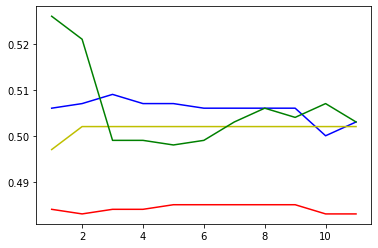

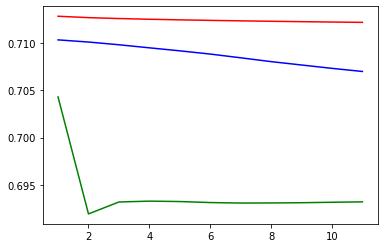

In [116]:
plt.plot(epochs , accRMS , c = "b")
plt.plot(epochs , accGD  , c = "y")
plt.plot(epochs , accADG , c = "r")
plt.plot(epochs , accADM , c = "g")
plt.show()
plt.plot(epochs , costRMS , c = "b")
plt.plot(epochs , costADG , c = "r")
plt.plot(epochs , costADM , c = "g")
plt.show()